# Survey2(CCAT-p), Toy Model, 3-sigma detection threshold

### basic info

In [16]:
from sparse_tools import *
from survey_params import *

survey_param = survey2_param()
dth = survey_param.dth
nu_binedges = survey_param.nu_binedges
nu_bins = survey_param.nu_bins
line_use = [0,2,3,4,5,6]
line_name_arr = [r'$CII$', r'$CO(2-1)$', r'$CO(3-2)$', r'$CO(4-3)$', r'$CO(5-4)$', r'$CO(6-5)$']
nu0_arr = [spec_lines.CII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(2).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(3).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(4).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(5).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(6).to(u.GHz, equivalencies=u.spectral()).value]
line_targ_vec = line_use

N_lc = 1#2500

sigI = 0#2.4e4
e_th = sigI
sig_th = 0.5

N_sim = 1#100

In [4]:
A, I_norm, z_coords, N_nu, N_z, sp2, z_coords_all, z_idx, I_coords_all \
= sparse_dict(dth, nu_binedges, line_use)

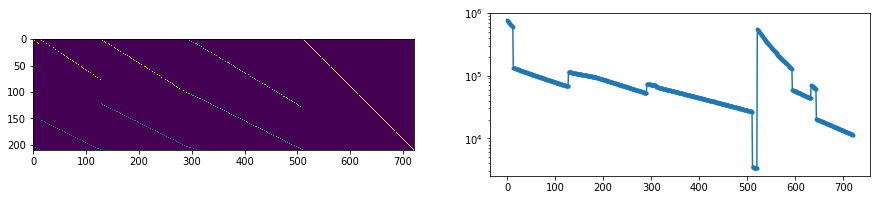

In [5]:
fig, ax = plt.subplots(1,2,figsize = (15,3))

ax[0].imshow(A)
ax[1].plot(I_norm, '.-')
ax[1].set_yscale('log')

### Generate ligh cones

In [13]:
N_true, Itrue_all, Itrue_targ \
   = gen_lightcone_toy(N_lc, dth, nu_binedges, sp2, z_coords_all, I_coords_all,\
                       z_idx, line_use, line_targ_vec)

### run MP

In [17]:
Ipred_targ_arr = np.zeros([N_sim]+list(Itrue_targ.shape))
for i in range(N_sim):
    Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
    N_pred = run_MP_sig(A, I_norm, Iobs_all, sigI, sig_th)
    _, Ipred_targ = gen_Ipred\
        (z_coords[sp2], N_pred[:,sp2], dth, nu_binedges, line_use, line_targ_vec, verbose = 0)    
    Ipred_targ_arr[i] = Ipred_targ

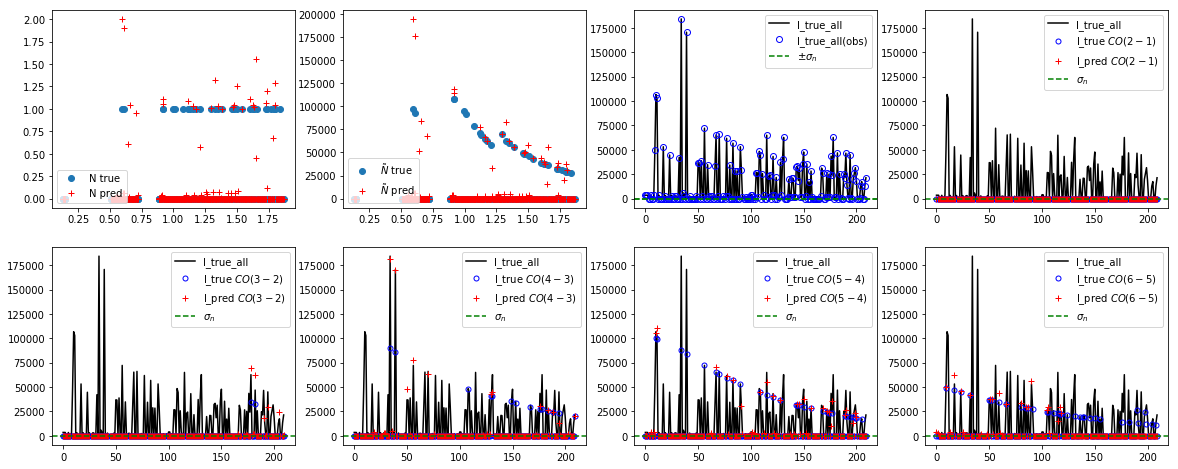

In [18]:
fig, ax = plt.subplots(2,4,figsize = (20,8))

ax[0][0].plot(z_coords[sp2], N_true[0,:],'o',label='N true')
ax[0][0].plot(z_coords[sp2], N_pred[0],'r+',label='N pred')
ax[0][0].legend(loc = 3)

ax[0][1].plot(z_coords[sp2], N_true[0,:]*I_norm[sp2],'o',label=r'$\tilde{N}$ true')
ax[0][1].plot(z_coords[sp2], N_pred[0,sp2]*I_norm[sp2],'r+',label=r'$\tilde{N}$ pred')
ax[0][1].legend(loc = 3)


ax[0][2].plot(Itrue_all[0,:],'k-', markerfacecolor='None',label='I_true_all')
ax[0][2].plot(Iobs_all[0,:],'bo', markerfacecolor='None',label='I_true_all(obs)')
ax[0][2].axhline(sigI, ls = '--', c = 'g', label = r'$\pm\sigma_n$')
ax[0][2].axhline(-sigI, ls = '--', c = 'g')
ax[0][2].legend(loc = 0)

targ_idx = 1
ax[0][3].plot(Itrue_all[0,:],'k-', label='I_true_all')
ax[0][3].plot(Itrue_targ[targ_idx,0,:],'bo', markerfacecolor='None', markersize = 5, 
           label='I_true ' + line_name_arr[targ_idx])
ax[0][3].plot(Ipred_targ[targ_idx,0,:],'r+', label='I_pred ' + line_name_arr[targ_idx])
ax[0][3].axhline(sigI, ls = '--', c = 'g', label = r'$\sigma_n$')
ax[0][3].legend(loc = 0)

targ_idx = 2
ax[1][0].plot(Itrue_all[0,:],'k-', label='I_true_all')
ax[1][0].plot(Itrue_targ[targ_idx,0,:],'bo', markerfacecolor='None', markersize = 5, 
           label='I_true ' + line_name_arr[targ_idx])
ax[1][0].plot(Ipred_targ[targ_idx,0,:],'r+', label='I_pred ' + line_name_arr[targ_idx])
ax[1][0].axhline(sigI, ls = '--', c = 'g', label = r'$\sigma_n$')
ax[1][0].legend(loc = 0)

targ_idx = 3
ax[1][1].plot(Itrue_all[0,:],'k-', label='I_true_all')
ax[1][1].plot(Itrue_targ[targ_idx,0,:],'bo', markerfacecolor='None', markersize = 5, 
           label='I_true ' + line_name_arr[targ_idx])
ax[1][1].plot(Ipred_targ[targ_idx,0,:],'r+', label='I_pred ' + line_name_arr[targ_idx])
ax[1][1].axhline(sigI, ls = '--', c = 'g', label = r'$\sigma_n$')
ax[1][1].legend(loc = 0)

targ_idx = 4
ax[1][2].plot(Itrue_all[0,:],'k-', label='I_true_all')
ax[1][2].plot(Itrue_targ[targ_idx,0,:],'bo', markerfacecolor='None', markersize = 5, 
           label='I_true ' + line_name_arr[targ_idx])
ax[1][2].plot(Ipred_targ[targ_idx,0,:],'r+', label='I_pred ' + line_name_arr[targ_idx])
ax[1][2].axhline(sigI, ls = '--', c = 'g', label = r'$\sigma_n$')
ax[1][2].legend(loc = 0)

targ_idx = 5
ax[1][3].plot(Itrue_all[0,:],'k-', label='I_true_all')
ax[1][3].plot(Itrue_targ[targ_idx,0,:],'bo', markerfacecolor='None', markersize = 5, 
           label='I_true ' + line_name_arr[targ_idx])
ax[1][3].plot(Ipred_targ[targ_idx,0,:],'r+', label='I_pred ' + line_name_arr[targ_idx])
ax[1][3].axhline(sigI, ls = '--', c = 'g', label = r'$\sigma_n$')
ax[1][3].legend(loc = 0)